<a href="https://colab.research.google.com/github/haripranesh1505/LetsGrowMore/blob/main/LetsGrowMore_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.9.2


# 2. Data Preprocessing

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


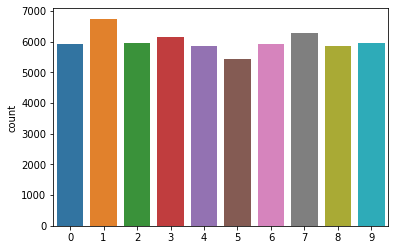

In [ ]:
sns.countplot(y_train)

## 2.2 Check for NaN Values

In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False

## 2.3 Normalization and Reshaping



In [ ]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

## 2.4 Label Encoding


In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

## 2.5 Visualize Data


tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


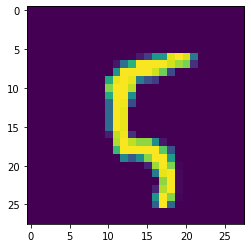

In [ ]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

# 3. CNN


## 3.1 Define the Model

In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])


## 3.2 Fit the Training Data


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

Testing the model on a validation dataset prevents overfitting of the data. We specified a 10% validation and 90% training split.

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 453s 534ms/step - loss: 0.2218 - acc: 0.9303 - val_loss: 0.0487 - val_acc: 0.9853
Epoch 2/5
844/844 [==============================] - 430s 509ms/step - loss: 0.0770 - acc: 0.9776 - val_loss: 0.0401 - val_acc: 0.9892
Epoch 3/5
844/844 [==============================] - 430s 510ms/step - loss: 0.0593 - acc: 0.9836 - val_loss: 0.0377 - val_acc: 0.9902
Epoch 4/5
844/844 [==============================] - 429s 508ms/step - loss: 0.0523 - acc: 0.9851 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 5/5
844/844 [==============================] - 429s 508ms/step - loss: 0.0488 - acc: 0.9870 - val_loss: 0.0328 - val_acc: 0.9923


# 4. Evaluate the Model

In [ ]:
testloss, testacc = model.evaluate(x_test, y_test)
print("ACCURACY IS ",testacc)

313/313 [==============================] - 19s 61ms/step - loss: 0.0218 - acc: 0.9935
ACCURACY IS  0.9934999942779541


## 4.1 Loss and Accuracy Curves

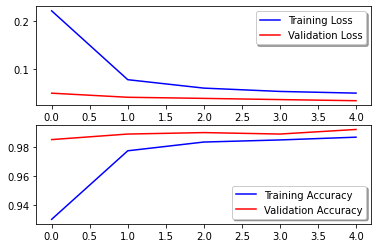

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 4.2 Predict Results

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 18s 56ms/step - loss: 0.0218 - acc: 0.9935


## 4.3 Confusion Matrix


In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 18s 56ms/step


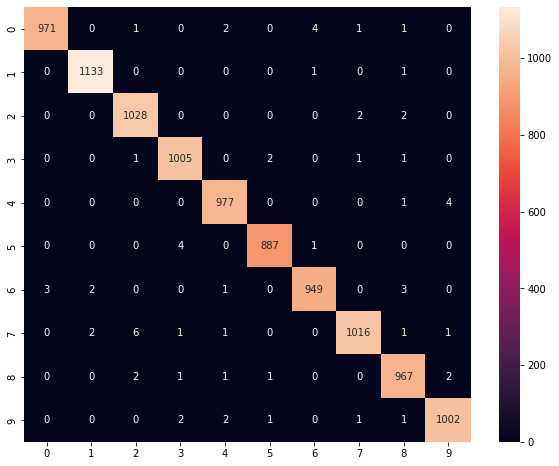

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')